# Exploratory data analysis of Boston Airbnb Dat

In [115]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Understanding

In [116]:
# Import datasets
calendar = pd.read_csv("./calendar.csv")
listings = pd.read_csv("./listings.csv")
reviews = pd.read_csv("./reviews.csv")

In [117]:
# Check calendar data
print("\nNumber of rows and columns in the calendar data:", calendar.shape)
calendar.head()


Number of rows and columns in the calendar data: (1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [118]:
# Check listings data
print("\nNumber of rows and columns in the listings data:", listings.shape)
listings.head()


Number of rows and columns in the listings data: (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [119]:
# Check columns in listings dataframe
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [120]:
#Provide a set of columns with 0 missing values.
no_nulls = set(listings.columns[listings.isnull().mean()==0])
print(no_nulls)

{'require_guest_profile_picture', 'calculated_host_listings_count', 'number_of_reviews', 'availability_60', 'host_verifications', 'last_scraped', 'accommodates', 'availability_30', 'id', 'latitude', 'listing_url', 'requires_license', 'has_availability', 'description', 'market', 'neighbourhood_group_cleansed', 'country_code', 'host_url', 'maximum_nights', 'instant_bookable', 'availability_90', 'extra_people', 'is_location_exact', 'guests_included', 'city', 'experiences_offered', 'state', 'require_guest_phone_verification', 'longitude', 'name', 'neighbourhood_cleansed', 'host_id', 'price', 'smart_location', 'jurisdiction_names', 'room_type', 'cancellation_policy', 'picture_url', 'calendar_updated', 'amenities', 'minimum_nights', 'country', 'street', 'scrape_id', 'calendar_last_scraped', 'availability_365', 'bed_type'}


In [121]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [122]:
 #Check listings info 
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# Business Understanding
Q1. What time of the year has the highest rental prices?
Q2. What is the relation between price and property type?
Q3. Which type of room has the majority of listings in Boston airbnb?


# Data Cleaning and Preparation

In [124]:
# Create indexes in all datasets
calendar.set_index('listing_id', inplace=True)
reviews.set_index('id', inplace=True)
listings.set_index('id', inplace=True)

In [125]:
# Remove dollar and comma sign from price column and convert it to float
calendar.price = calendar.price.str.lstrip('$').str.replace(',', '').astype('float')

In [126]:
# Convert price column to float type after stripping dollar, comma character
listings.price = listings.price.str.lstrip('$').str.replace(',', '').astype('float')

In [127]:
# Remove columns which have only null values
listings = listings.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1)

In [128]:
# Create a new dataframe that's a copy of listings data frame
features = listings.copy()

In [129]:
# Drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0
listings = listings[listings.price > 0]
listings = listings[listings.bathrooms >= 1]
listings = listings[listings.bedrooms > 0]
listings = listings[listings.accommodates > 0]

In [130]:
# Replace missing values with zeros
listings.fillna(0, inplace=True)

In [138]:
# function for plotting 
def plot_hist(df, x, y, title):
    """
    Plot histogram
    
    INPUT:
    df: pandas dataframe
    
    x: str
        Column name in df for x value
    
    y: str
        Column name in df for y value
        
    title: str
        Title for the histogram
        
    OUTPUT:
    histogram plot
    
    """
    df.plot(kind='bar', 
           x=x,
           y=y,
           figsize =(15,8), 
           title = title, 
           legend = False)
    plt.ylabel(y)

# Exploratory Analysis and Evaluation of the results

# Q1 What time of the year has the highest rental prices?

In [141]:
# fill 0 for nan for price & only filter listings with price > 0
calendar.fillna(0, inplace=True)
calendar = calendar[calendar.price != 0]
calendar = calendar[calendar.price >= 0]

In [142]:
# break the date into year, month, and day for further analysis
calendar['Year'],calendar['Month'],calendar['Day'] = calendar['date'].str.split('-').str

<ipython-input-142-c48b33b98970>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  calendar['Year'],calendar['Month'],calendar['Day'] = calendar['date'].str.split('-').str


In [143]:
# get the average price for each year-month combo
year_df = calendar.groupby(['Year','Month']).price.mean()
year_df = year_df.reset_index()
year_df = year_df.rename(columns={'price':'Average_Price'})
year_df['Year-Month'] = year_df['Year'].map(str) + "-" + year_df['Month'].map(str)

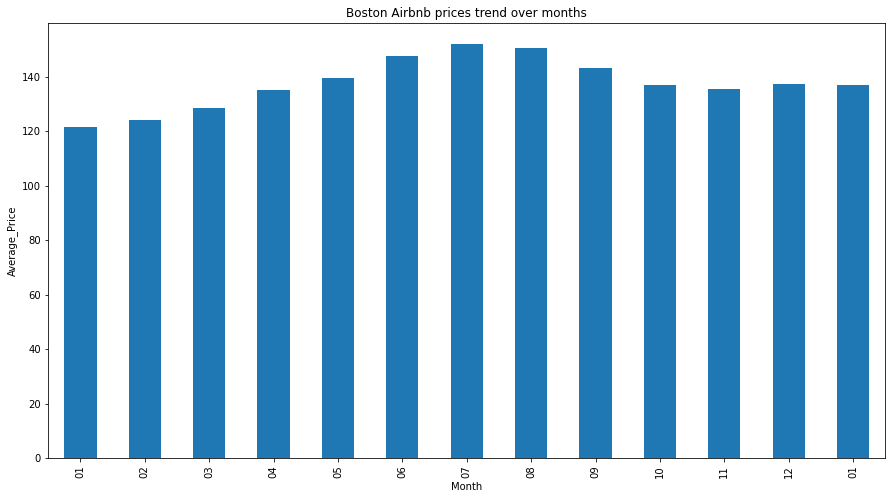

In [144]:

plot_hist(year_df, 'Month', 'Average_Price', 'Boston Airbnb prices trend over months')

# Q2. What is the relation between price and property type?

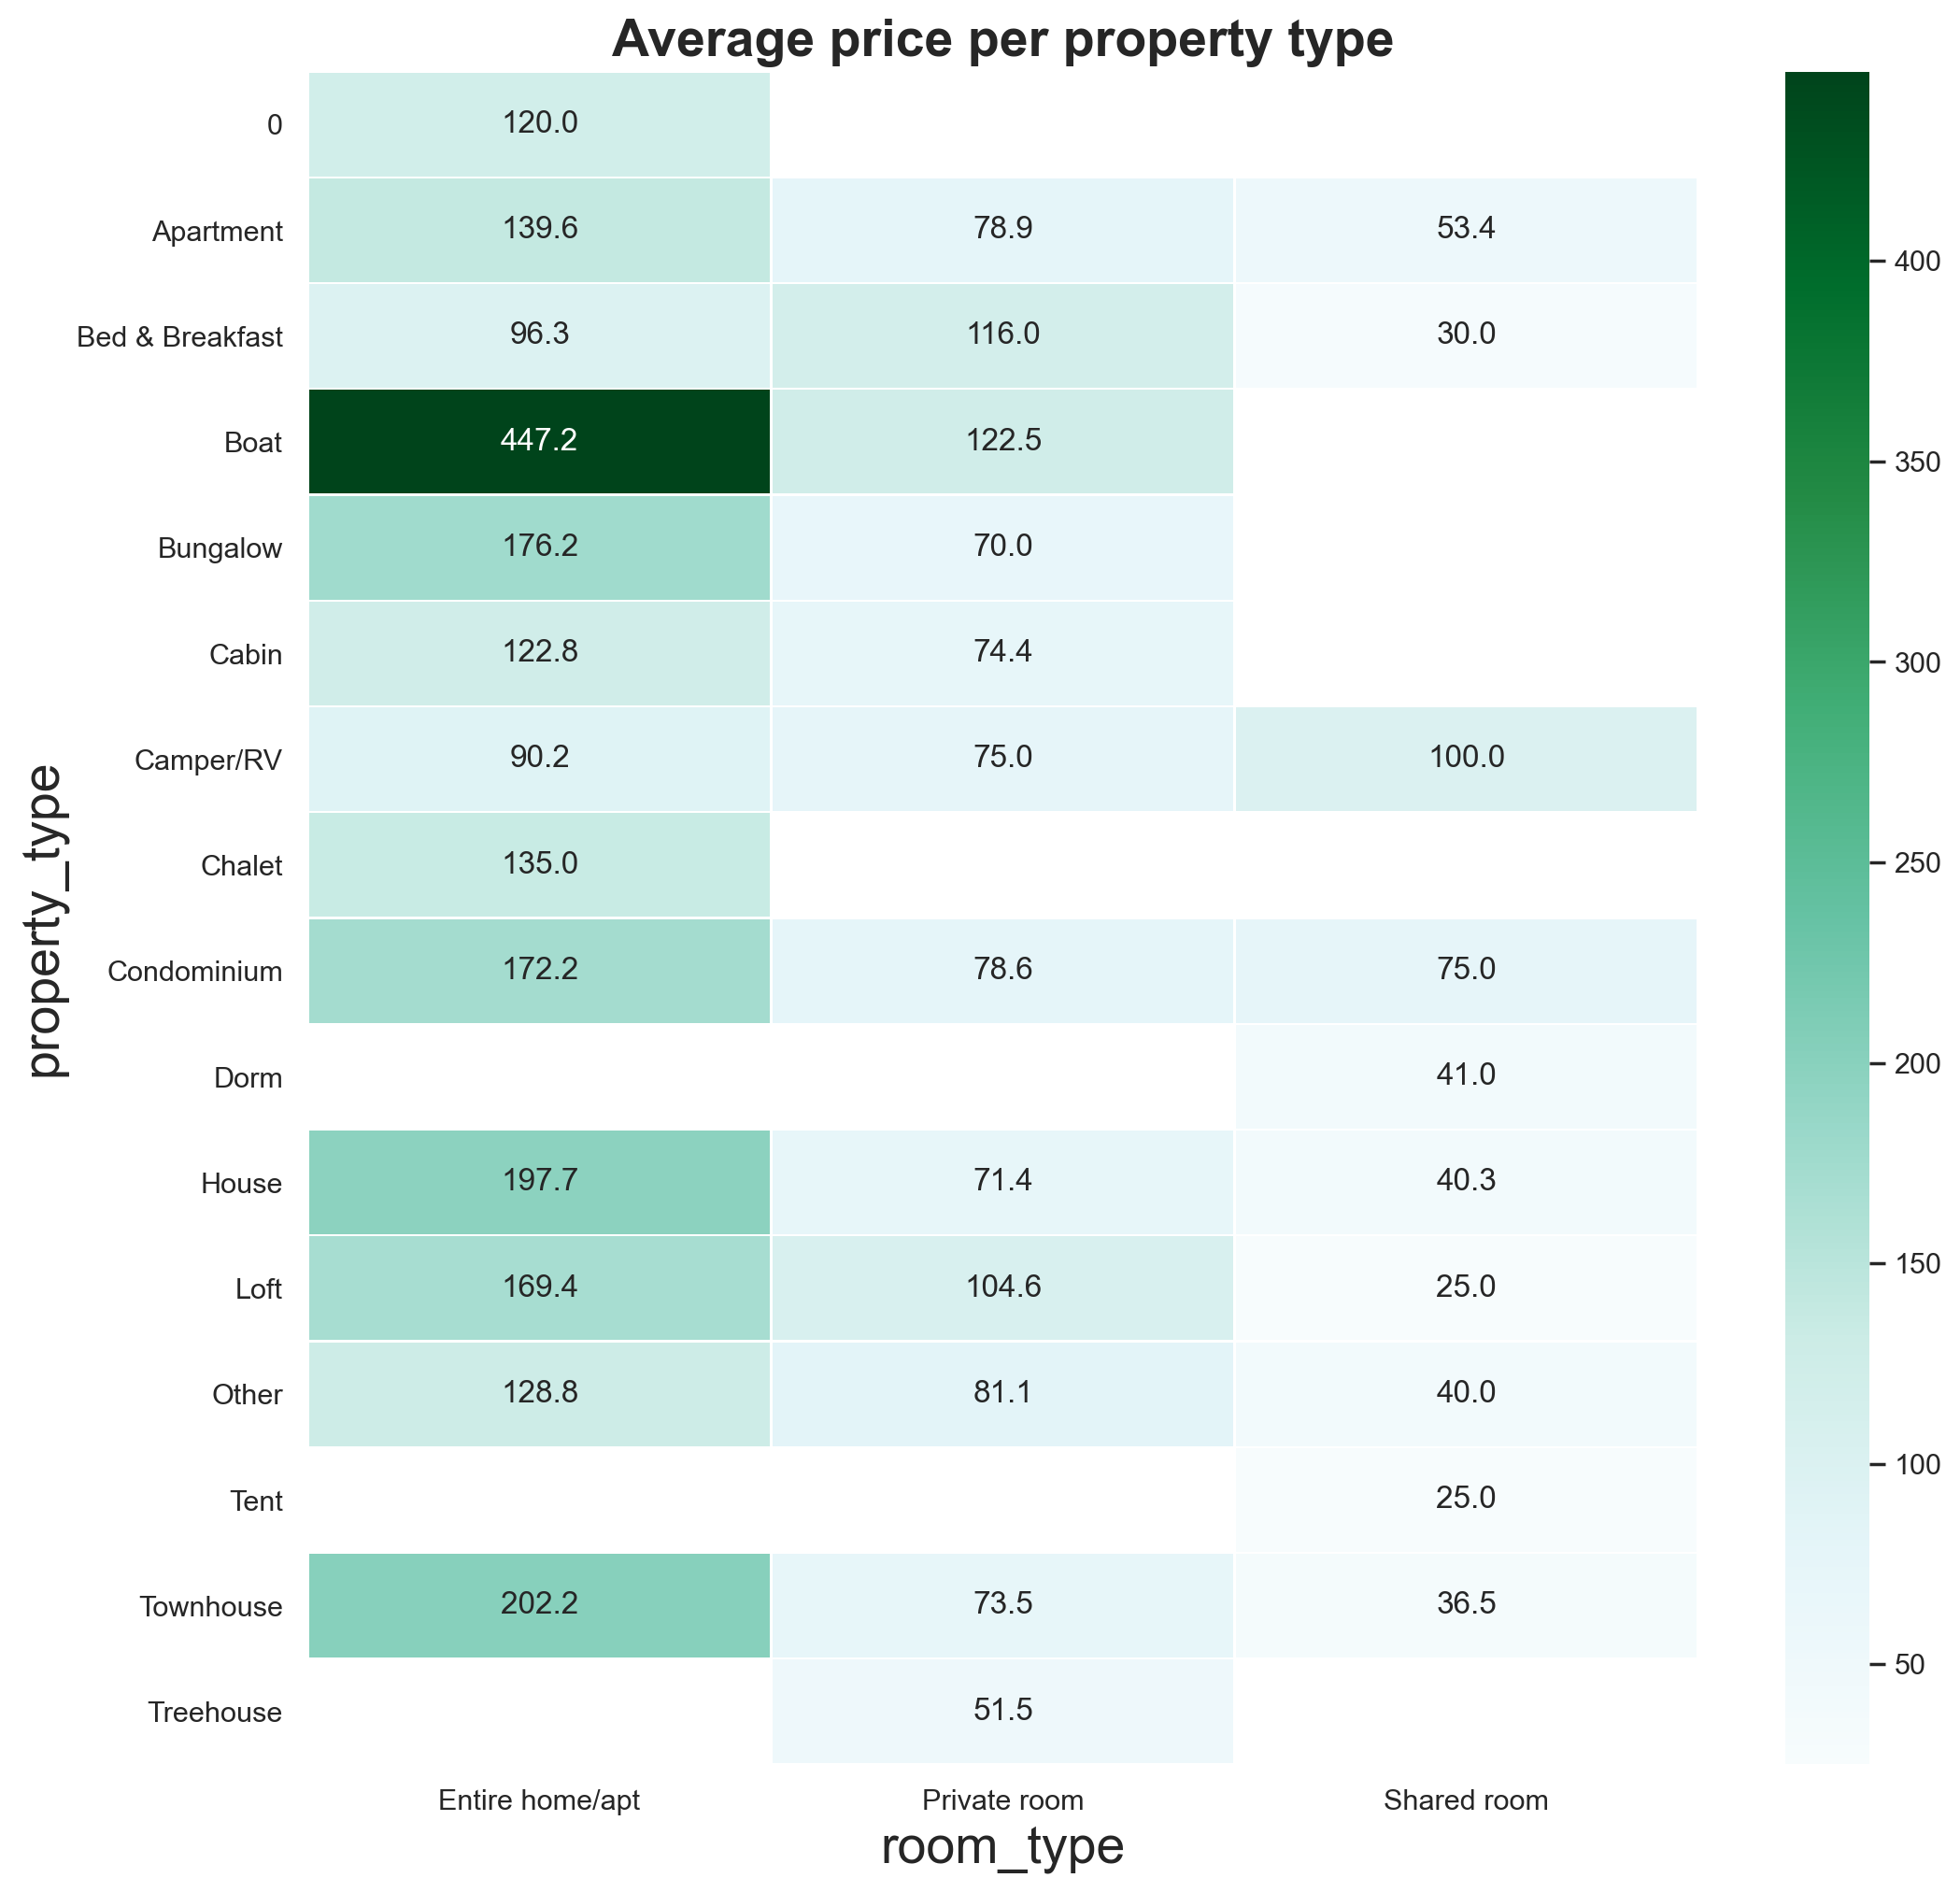

In [161]:
plt.figure(figsize=(12,12), dpi=200)
plt.title('Average price per property type', weight ='bold', size = 20);
plt.xlabel('room_type', size = 20)
plt.ylabel('property_type', size = 20)
sns.heatmap(listings.groupby(['property_type','room_type']).price.mean().unstack(), annot=True, fmt='.1f', linewidths= .5, cmap='BuGn')

# The above heatmap shows a general trend when the room type is Entire home/apt, price is generally higher while it is less in case of shared room

# Q3. Which type of room has the majority of listings in Boston airbnb?

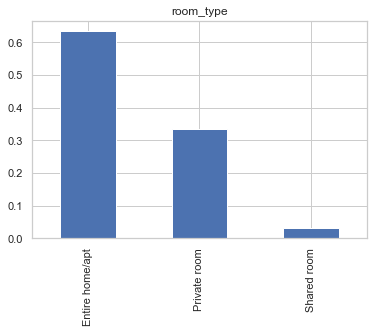

In [159]:
count_vals = listings.room_type.value_counts()#Provide a pandas series of the counts for each Country

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/listings.shape[0]).plot(kind="bar");
plt.title("room_type");